In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
cred = pd.read_csv(r"C:\Users\caasi\Downloads\CreditCard_Analysis (1).csv")

In [3]:
cred.head(5)

,Account_Num,Region,Sincome,Education,Dependents,Nov,Dec,Jan,Feb,Mar,...,Ploan,SalAcc,CreditCard,AODate,CIDate,GenDate,AOMonth,CIMonth,Type_CC,N_Days
0,5.060000e+11,3,0,3,0,$177.00,$373.00,$234.00,$191.00,$353.00,...,1,0,0,22/11/2019,31/12/9999,2914675,Nov,NaaN,0,1000
1,5.450000e+11,4,0,6,1,"$1,316.00","$2,067.00","$1,917.00",$474.00,"$1,142.00",...,1,0,1,10/01/2019,12/02/2019,34,Jan,Feb,3,34
2,5.810000e+11,4,0,1,2,$517.00,$976.00,"$1,378.00",$819.00,"$1,317.00",...,1,0,0,31/01/2019,31/12/9999,2914970,Jan,NaaN,0,1000
3,2.270000e+11,1,0,1,0,"$1,187.00","$1,740.00",$908.00,"$1,046.00",$693.00,...,0,0,0,02/08/2019,31/12/9999,2914787,Aug,NaaN,0,1000
4,2.470000e+11,1,1,3,3,"$1,773.00","$1,157.00","$1,697.00","$1,077.00","$1,847.00",...,0,0,0,31/12/2019,31/12/9999,2914636,Dec,NaaN,0,1000


In [4]:
cred.tail(5)

,Account_Num,Region,Sincome,Education,Dependents,Nov,Dec,Jan,Feb,Mar,...,Ploan,SalAcc,CreditCard,AODate,CIDate,GenDate,AOMonth,CIMonth,Type_CC,N_Days
30241,2.210000e+11,2,0,4,6,$445.00,$508.00,$250.00,"$2,022.00",$489.00,...,0,0,0,31/10/2019,31/12/9999,2914697,Oct,NaaN,0,1000
30242,3.410000e+11,4,0,3,3,$327.00,$855.00,$504.00,$771.00,$943.00,...,0,0,0,26/03/2019,31/12/9999,2914916,Mar,NaaN,0,1000
30243,2.880000e+11,2,1,1,4,$366.00,$456.00,$378.00,$480.00,$303.00,...,0,0,0,17/06/2019,31/12/9999,2914833,Jun,NaaN,0,1000
30244,3.470000e+11,4,0,1,1,$465.00,$400.00,$390.00,$543.00,$475.00,...,0,1,0,15/05/2019,31/12/9999,2914866,May,NaaN,0,1000
30245,4.390000e+11,2,0,3,5,$176.00,$248.00,$204.00,$417.00,$383.00,...,0,1,0,05/04/2019,31/12/9999,2914906,Apr,NaaN,0,1000


In [5]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30246 entries, 0 to 30245
Data columns (total 33 columns):
Account_Num    30246 non-null float64
Region         30246 non-null int64
Sincome        30246 non-null int64
Education      30246 non-null int64
Dependents     30246 non-null int64
Nov            30246 non-null object
Dec            30246 non-null object
Jan            30246 non-null object
Feb            30246 non-null object
Mar            30246 non-null object
Apr            30246 non-null object
May            30246 non-null object
Jun            30246 non-null object
Jul            30246 non-null object
Aug            30246 non-null object
Sep            30246 non-null object
Oct            30246 non-null object
Abalance       30246 non-null object
AB>$1000       30246 non-null int64
checkb         30246 non-null int64
Aloan          30246 non-null int64
Hloan          30246 non-null int64
Dpayment       30246 non-null int64
Ploan          30246 non-null int64
SalAcc      

In [6]:
x = cred[['Region','Sincome','Education','Abalance','Dependents','checkb','AB>$1000','Aloan','Hloan','Dpayment','SalAcc','Type_CC','N_Days']]
y = cred['CreditCard']

In [80]:
x.head(4)

,Region,Sincome,Education,Abalance,Dependents,checkb,AB>$1000,Aloan,Hloan,Dpayment,SalAcc,Type_CC,N_Days
0,2,0,2,4329,0,0,0,1,0,0,0,0,61
1,3,0,5,3121,1,0,9,0,0,0,0,3,3
2,3,0,0,7970,2,0,3,0,0,0,0,0,61
3,0,0,0,8157,0,0,4,0,0,0,0,0,61


In [8]:
le = preprocessing.LabelEncoder()
cred = cred.apply(le.fit_transform)

In [79]:
cred.head(6)

,Account_Num,Region,Sincome,Education,Dependents,Nov,Dec,Jan,Feb,Mar,...,Ploan,SalAcc,CreditCard,AODate,CIDate,GenDate,AOMonth,CIMonth,Type_CC,N_Days
0,406,2,0,2,0,1075,1336,1195,1087,1313,...,1,0,0,262,403,100,9,9,0,61
1,445,3,0,5,1,316,1160,917,1427,142,...,1,0,1,108,148,3,4,3,3,3
2,481,3,0,0,2,1472,1955,378,1779,317,...,1,0,0,358,403,395,4,9,0,61
3,127,0,0,0,0,187,739,1882,46,1652,...,0,0,0,19,403,212,1,9,0,61
4,147,0,1,2,3,772,157,697,77,844,...,0,0,0,364,403,61,2,9,0,61
5,400,1,0,0,2,1547,491,1864,631,1005,...,0,0,0,114,403,235,5,9,0,61


In [10]:
x = cred[['Region','Sincome','Education','Abalance','Dependents','checkb','AB>$1000','Aloan','Hloan','Dpayment','SalAcc','Type_CC','N_Days']]
y = cred['CreditCard']

In [11]:
print(x)

       Region  Sincome  Education  Abalance  Dependents  checkb  AB>$1000  \
0           2        0          2      4329           0       0         0   
1           3        0          5      3121           1       0         9   
2           3        0          0      7970           2       0         3   
3           0        0          0      8157           0       0         4   
4           0        1          2      2666           3       0         8   
5           1        0          0      9093           2       0         6   
6           1        0          0      1745           4       0         8   
7           1        0          0      4422           2       0         0   
8           1        0          0      1654           1       0         7   
9           2        0          1      4302           0       0         0   
10          3        0          1       736           0       0         6   
11          3        0          1      4730           2       0         0   

In [12]:
print(y)

0        0
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        1
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       1
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       1
        ..
30216    0
30217    0
30218    0
30219    0
30220    0
30221    0
30222    0
30223    0
30224    0
30225    0
30226    0
30227    0
30228    0
30229    0
30230    0
30231    0
30232    0
30233    0
30234    1
30235    0
30236    0
30237    0
30238    0
30239    0
30240    0
30241    0
30242    0
30243    0
30244    0
30245    0
Name: CreditCard, Length: 30246, dtype: int64


In [13]:
#train split data 
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [81]:
x_train = x_train.replace((np.inf, -np.inf, np.nan),0).reset_index(drop=True)

# DecisionTree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score
import seaborn as sns

In [17]:
credDTC = DecisionTreeClassifier()

In [18]:
credDTC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
parameters = credDTC.get_params()
print(parameters)

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [20]:
y_pred = credDTC.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#r square value, coeffi, intercept
r_sq2 = credDTC.score(x_train, y_train)
print('coeffi of determination',r_sq2)

coeffi of determination 1.0


In [23]:
from sklearn.metrics import r2_score
print('r2_score:', r2_score(y_test,y_pred))

r2_score: 0.997310508665


In [24]:
from sklearn import metrics

In [25]:
print('MSE', metrics.mean_squared_error(y_test,y_pred))

MSE 0.000165289256198


In [26]:
print('MAE', metrics.mean_absolute_error(y_test,y_pred))

MAE 0.000165289256198


In [27]:
print('ROOT MSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

ROOT MSE: 0.0128564869307


In [61]:
print('accuracy score DTC',accuracy_score(y_test, y_pred))

accuracy score DTC 0.999834710744


In [62]:
print('f1 score for DTC', f1_score(y_test, y_pred))

f1 score for DTC 0.998742138365


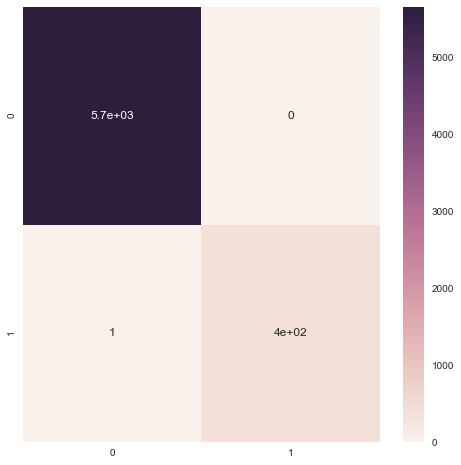

In [83]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.show()

# LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [38]:
print('ACCURACY-LOGISTIC REGRESSION:', accuracy_score(y_test, lr_pred))

ACCURACY-LOGISTIC REGRESSION: 0.999173553719


In [39]:
print('F1 SCORE- LOGISTIC REGRESSION::::', f1_score(y_test, lr_pred))

F1 SCORE- LOGISTIC REGRESSION:::: 0.993678887484


In [43]:
print('confusion matrix', confusion_matrix(y_test, lr_pred))

confusion matrix [[5652    0]
 [   5  393]]


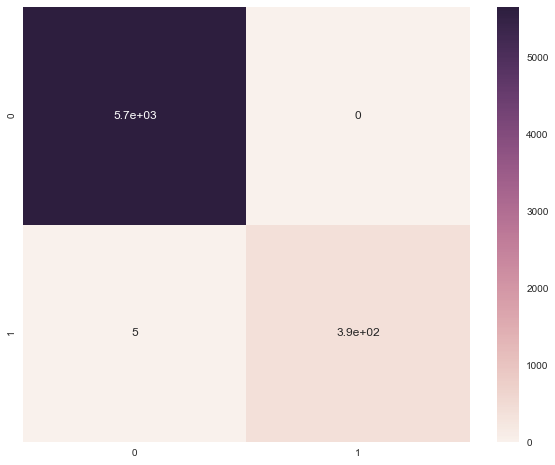

In [46]:
cm = confusion_matrix(y_test, lr_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [49]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print('ACCURACY SCORE BY RANDOM FOREST CLASSI', accuracy_score(y_test,rf_pred))

ACCURACY SCORE BY RANDOM FOREST CLASSI 1.0


In [57]:
print('F1 score by RAND FORE CLASS', f1_score(y_test, rf_pred))

F1 score by RAND FORE CLASS 1.0


In [58]:
print(' confusion matrix by RAND FOR CLAS', confusion_matrix(y_test, rf_pred))

 confusion matrix by RAND FOR CLAS [[5652    0]
 [   0  398]]


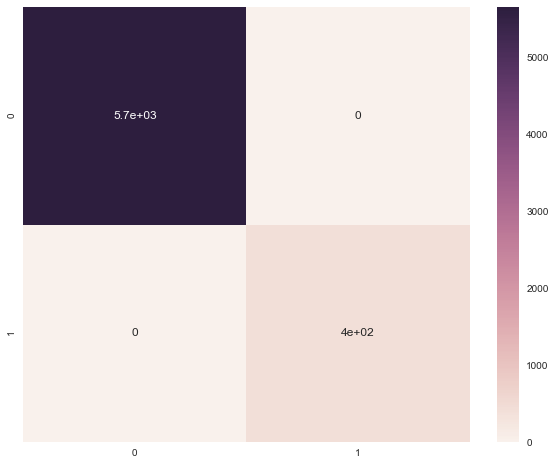

In [60]:
cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()


# Decision tree regression

In [63]:
from sklearn.tree import DecisionTreeRegressor


In [65]:
credDTR = DecisionTreeRegressor()
credDTR.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [69]:
dtr_pred = credDTR.predict(x_test)
print(dtr)

[ 0.  0.  0. ...,  0.  0.  0.]


In [74]:
r_sq2 = credDTR.score(x_train, y_train)
print('coefficent of determ', r_sq2)

coefficent of determ 1.0


In [75]:
from sklearn import metrics
print('r2:', r2_score(y_test, dtr_pred))

r2: 0.997310508665


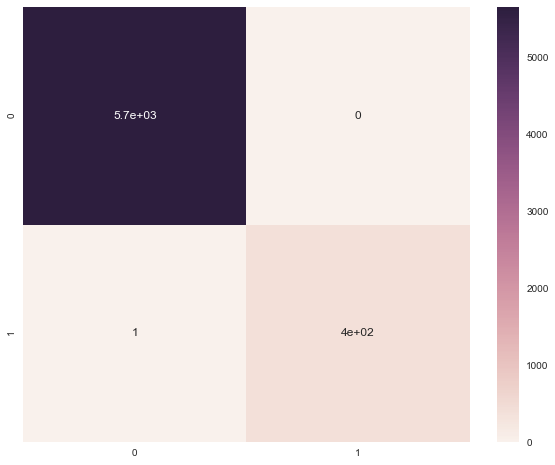

In [78]:
cm = confusion_matrix(y_test, dtr_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()
